# Plotting the correlation length
<div class="alert alert-block alert-info">
In this notebook the correlation length computed for each monthly period for the DOHC is plotted.
</div>

In [2]:
using PyPlot
using DelimitedFiles
using Statistics
const plt = PyPlot
include("./config.jl")
include("./ME4OH.jl")

[ Info: Directory exists
[ Info: File already downloaded


Main.ME4OH

## Compute the correlation length
(the results were already saved in a file)

In [77]:
datadir = "/home/ctroupin/data/ME4OH/data/en4.1.1/1979-2014/full/update/extra/"
datafilelist = ME4OH.get_filelist(datadirextra, timeperiod1)

lenall = Array{Float64}(undef, length(datafilelist), 3)

for (iii, datafile) in enumerate(datafilelist)
    lon, lat, dates, vertical_levels, T, S, dohc, dohc_mask, bounds = ME4OH.read_profile(datafile)
    obslon, obslat, obsdepth, obsdates, obsval = 
    ME4OH.vectorize_dohc(lon, lat, bounds, dates, dohc, dohc_mask);
    
    # Perform fit to get idea of the best correlation length (changing by level)
    lenxy, dbinfo = DIVAnd.fithorzlen((obslon, obslat, obsdepth), obsval, bounds[:,2]);
    lenall[iii,:] = lenxy;
end

### Save the results in a file

In [ ]:
writedlm("../output/dohc_corrlength.dat", round.(lenall, digits=2), '\t')

## Set paths and read data

In [27]:
CLfile = "../output/dohc_corrlength.dat"

"../output/dohc_corrlength.dat"

In [9]:
CLdata = readdlm(CLfile, '\t');
datesr = ME4OH.get_timegrid(timeperiod1);

LoadError: UndefVarError: `CLfile` not defined

In [30]:
datadir = "/home/ctroupin/data/ME4OH/data/en4.1.1/1979-2014/full/update/"
datafilelist = ME4OH.get_filelist(datadir, timeperiod1)
lon, lat, dates, vertical_levels, T, S, dohc, dohc_mask, bounds = ME4OH.read_profile(datafilelist[1]);
bounds

3×2 Matrix{Float32}:
   0.0     286.609
 286.609   685.927
 685.927  1985.31

## Make the plot

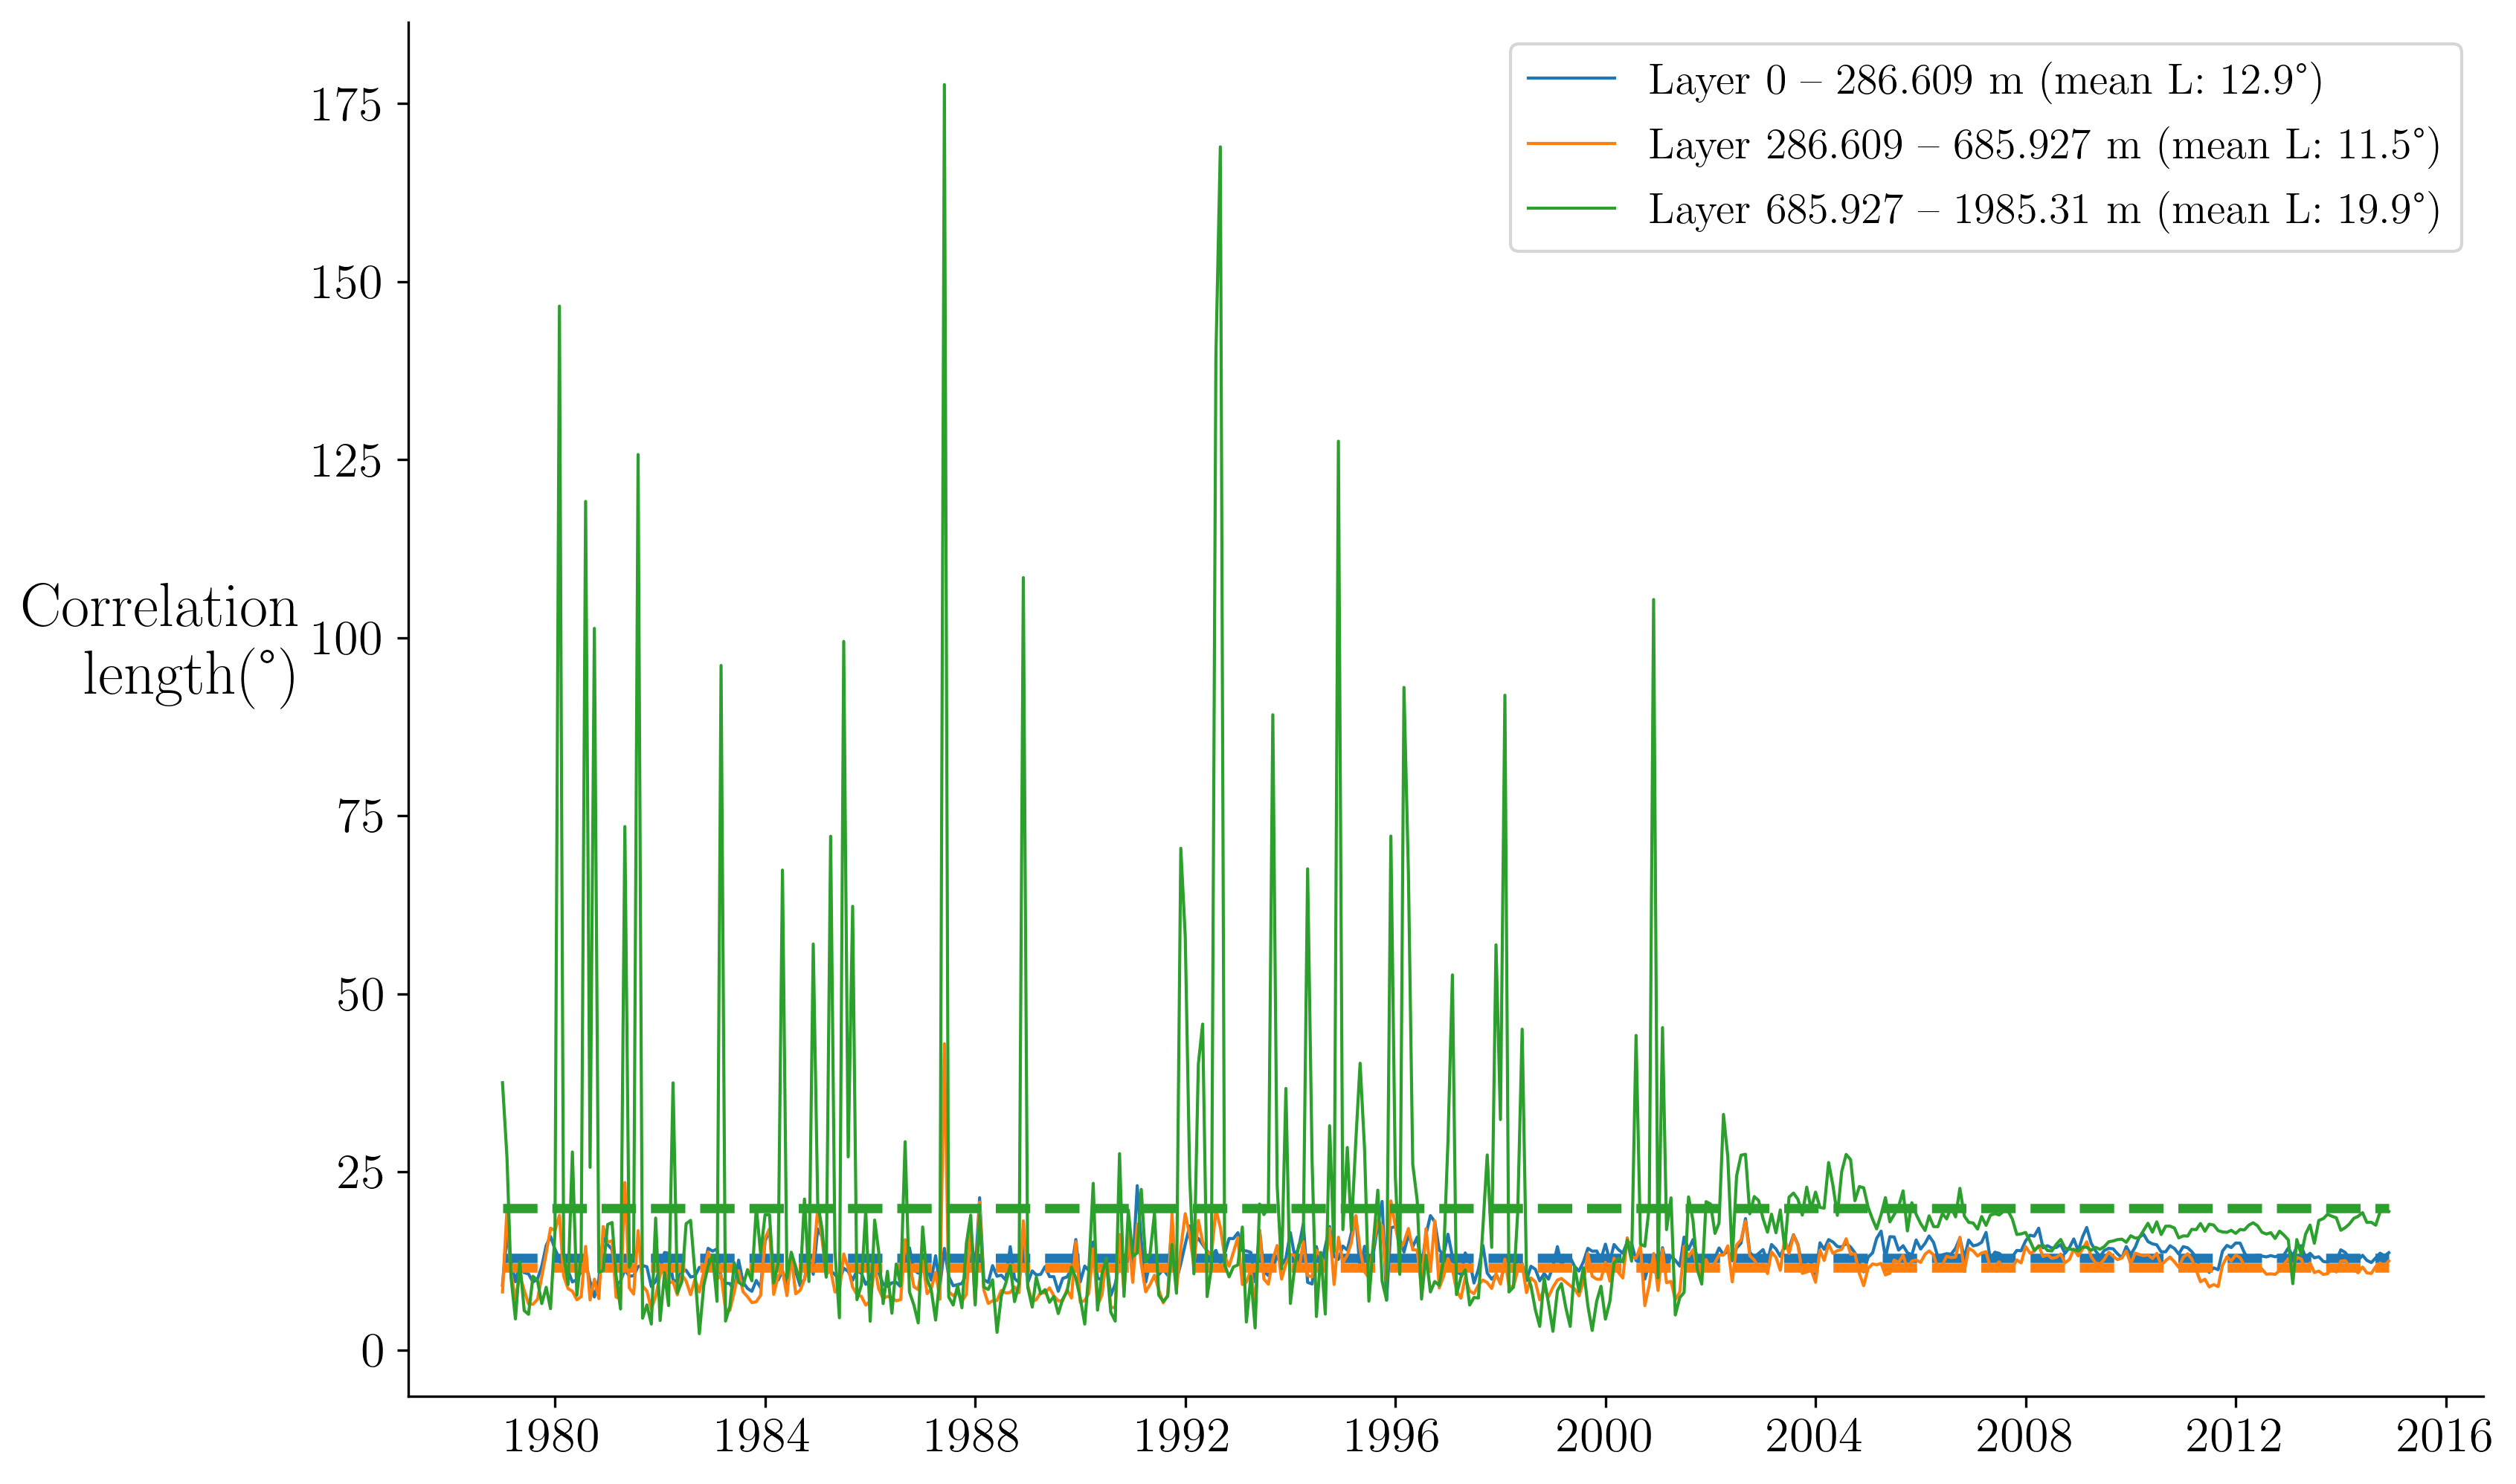

In [73]:
fig = plt.figure()
ax = plt.subplot(111)
p1 = plt.plot(datesr, CLdata[:,1], lw=1, label="Layer 0 -- 286.609 m (mean L: $(round(mean(CLdata[:,1]), digits=1))°)")
thecolor = p1[1].get_color()
plt.hlines(mean(CLdata[:,1]), xmin=datesr[1], xmax=datesr[end], linestyle="dashed", color=thecolor)

p1 = plt.plot(datesr, CLdata[:,2], lw=1, label="Layer 286.609 -- 685.927 m (mean L: $(round(mean(CLdata[:,2]), digits=1))°)")
thecolor = p1[1].get_color()
plt.hlines(mean(CLdata[:,2]), xmin=datesr[1], xmax=datesr[end], linestyle="dashed", color=thecolor)

p1 = plt.plot(datesr, CLdata[:,3], lw=1, label="Layer 685.927 -- 1985.31 m (mean L: $(round(mean(CLdata[:,3]), digits=1))°)")
thecolor = p1[1].get_color()
plt.hlines(mean(CLdata[:,3]), xmin=datesr[1], xmax=datesr[end], linestyle="dashed", color=thecolor)

plt.legend(fontsize=14)
ax.set_ylabel("Correlation\nlength(°)", ha="right", rotation=0)
ax.spines["top"].set_visible(false)
ax.spines["right"].set_visible(false)

In [20]:
CLlist = ["/home/ctroupin/Projects/DIVAnd-ME4OH/src/correlationlength_1979-2014_adohc_level1.txt",
          "/home/ctroupin/Projects/DIVAnd-ME4OH/src/correlationlength_1979-2014_adohc_level2.txt",
          "/home/ctroupin/Projects/DIVAnd-ME4OH/src/correlationlength_1979-2014_adohc_level3.txt"]
datesr = ME4OH.get_timegrid(timeperiod1);

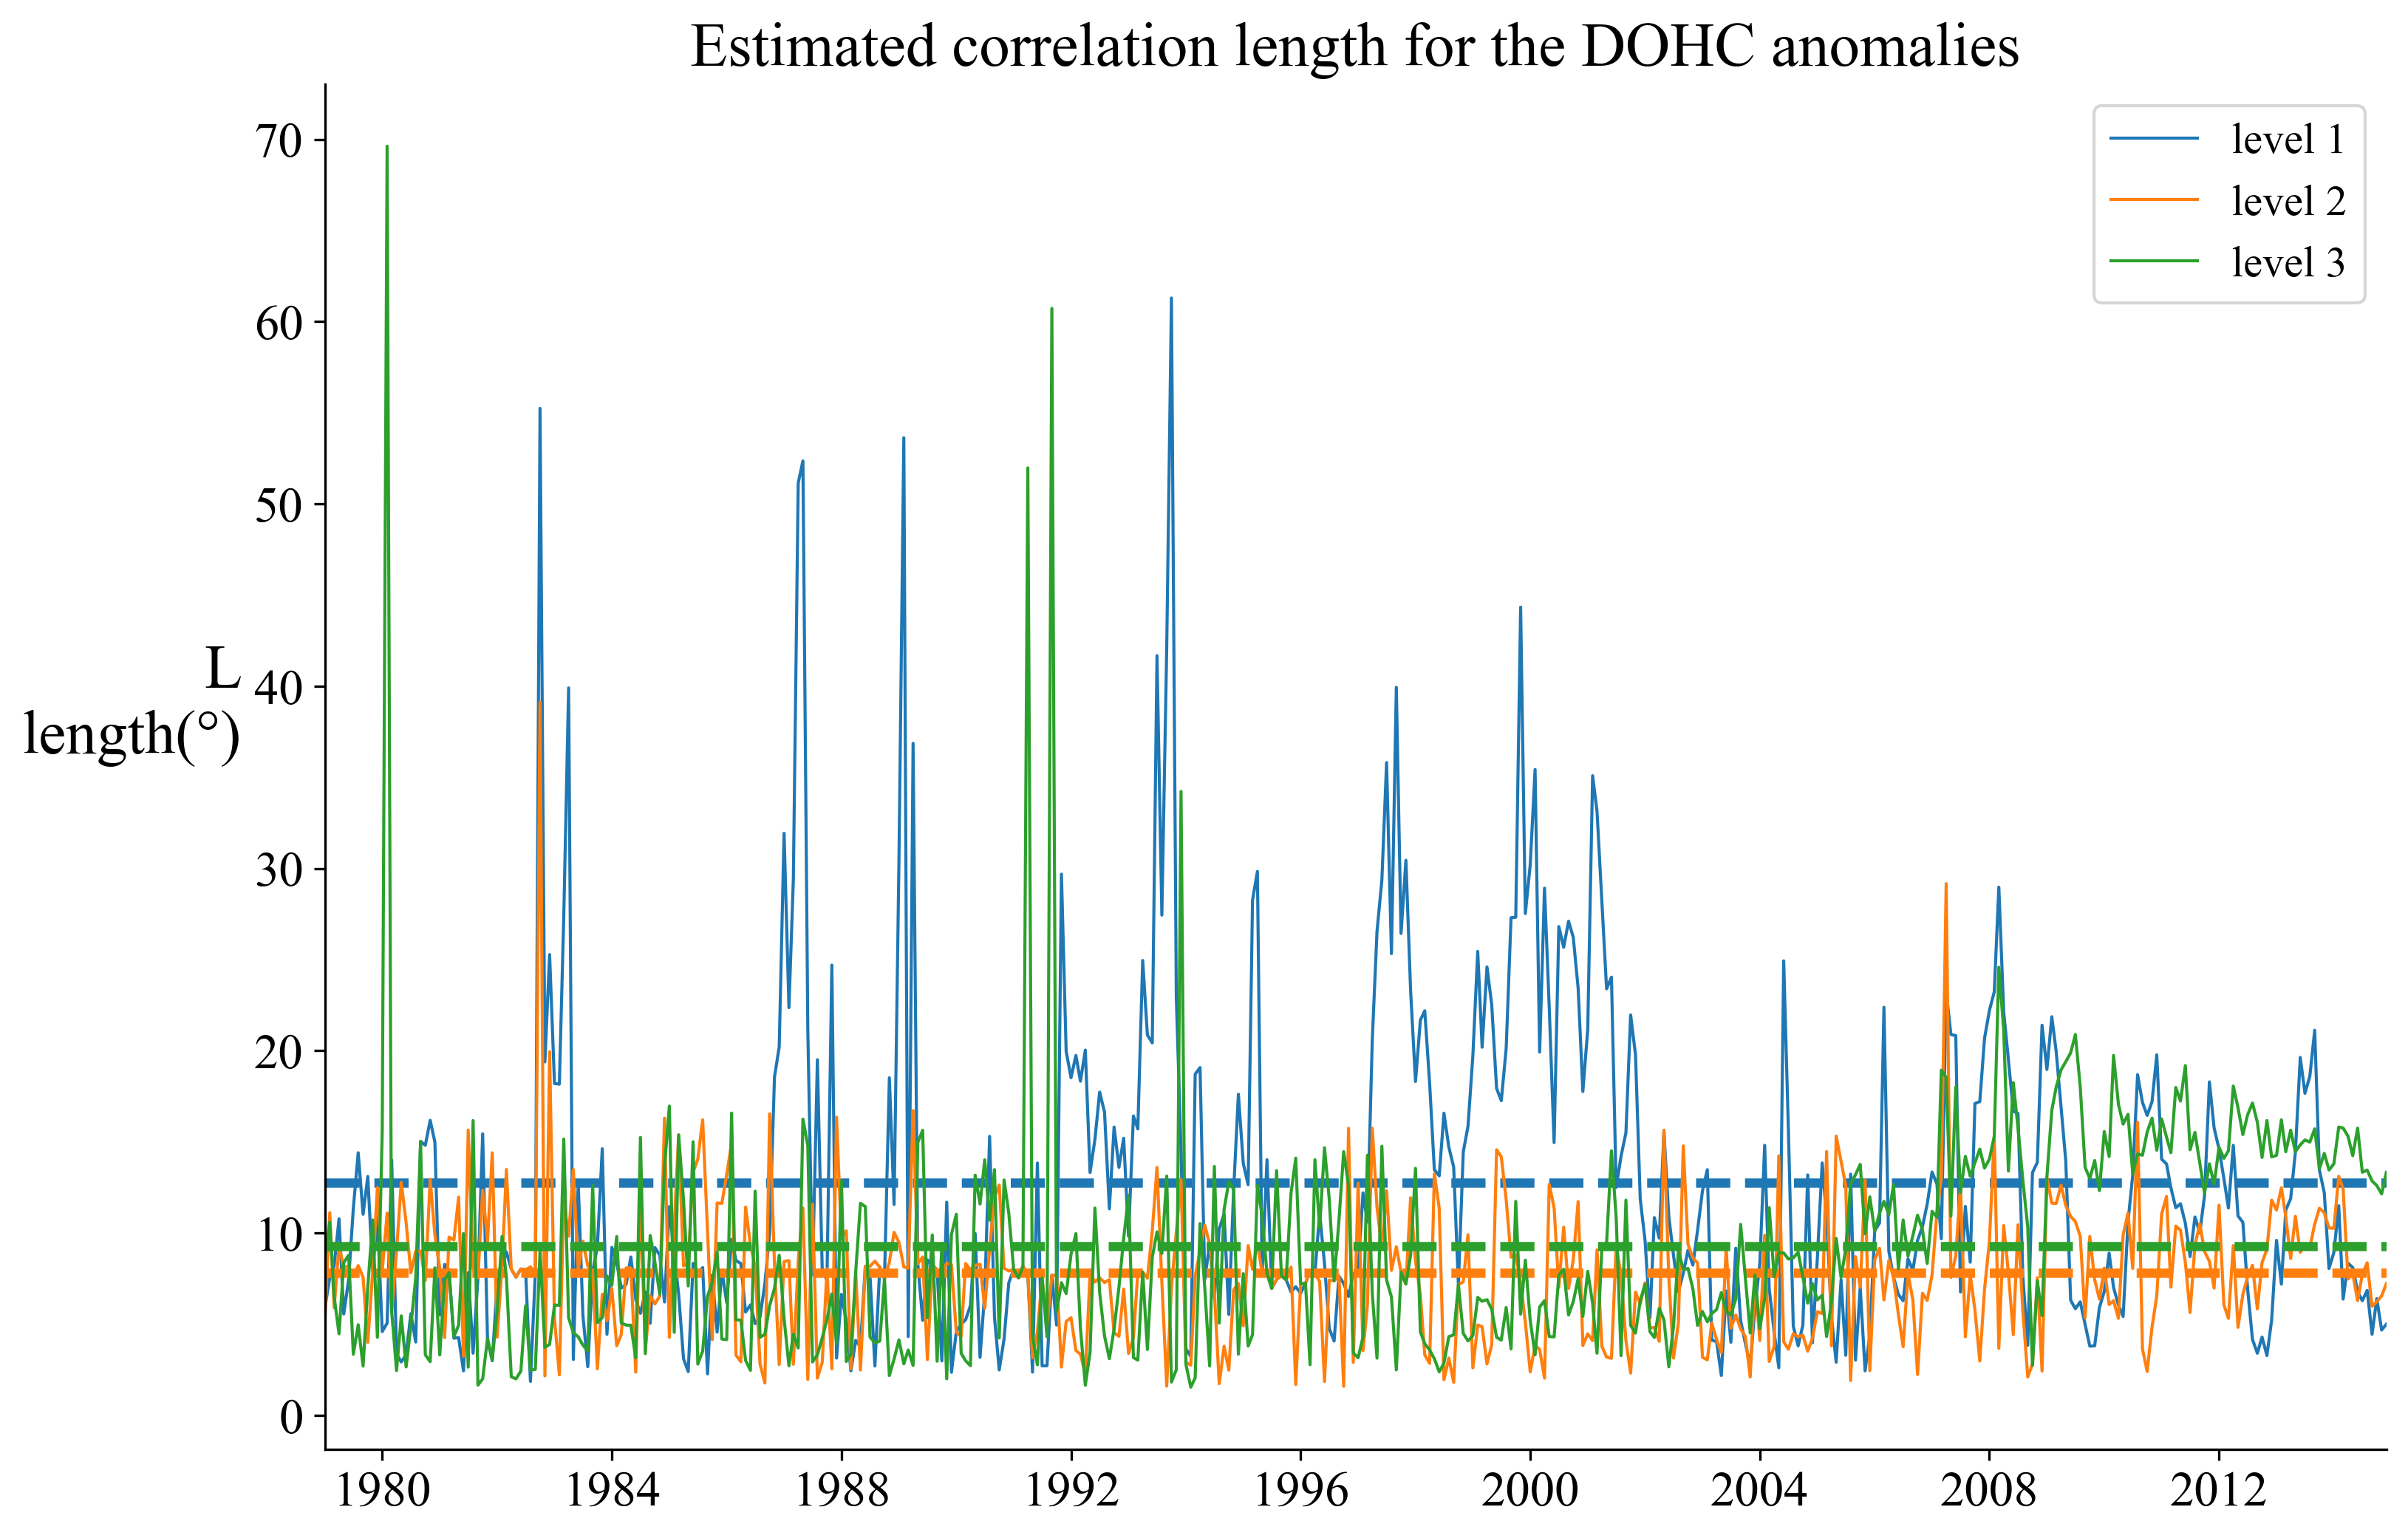

In [19]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
for (iii, CLfile) in enumerate(CLlist)
    data = readdlm(CLfile)
    p1 = ax.plot(datesr, data, lw=1, label="level $(iii)")
    thecolor = p1[1].get_color()
    ax.hlines(mean(data), xmin=datesr[1], xmax=datesr[end], linestyle="dashed", color=thecolor)
end
ax.set_ylabel("L\nlength(°)", ha="right", rotation=0)
ax.spines["top"].set_visible(false)
ax.spines["right"].set_visible(false)
ax.set_xlim(datesr[1], datesr[end])
ax.legend(fontsize=14)
ax.set_title("Estimated correlation length for the DOHC anomalies")
plt.show()

In [27]:
CLlist = ["/home/ctroupin/Projects/DIVAnd-ME4OH/src/correlationlength_1979-2014_dohc_level1.txt",
          "/home/ctroupin/Projects/DIVAnd-ME4OH/src/correlationlength_1979-2014_dohc_level2.txt",
          "/home/ctroupin/Projects/DIVAnd-ME4OH/src/correlationlength_1979-2014_dohc_level3.txt"]

3-element Vector{String}:
 "/home/ctroupin/Projects/DIVAnd-" ⋯ 22 bytes ⋯ "ength_1979-2014_dohc_level1.txt"
 "/home/ctroupin/Projects/DIVAnd-" ⋯ 22 bytes ⋯ "ength_1979-2014_dohc_level2.txt"
 "/home/ctroupin/Projects/DIVAnd-" ⋯ 22 bytes ⋯ "ength_1979-2014_dohc_level3.txt"

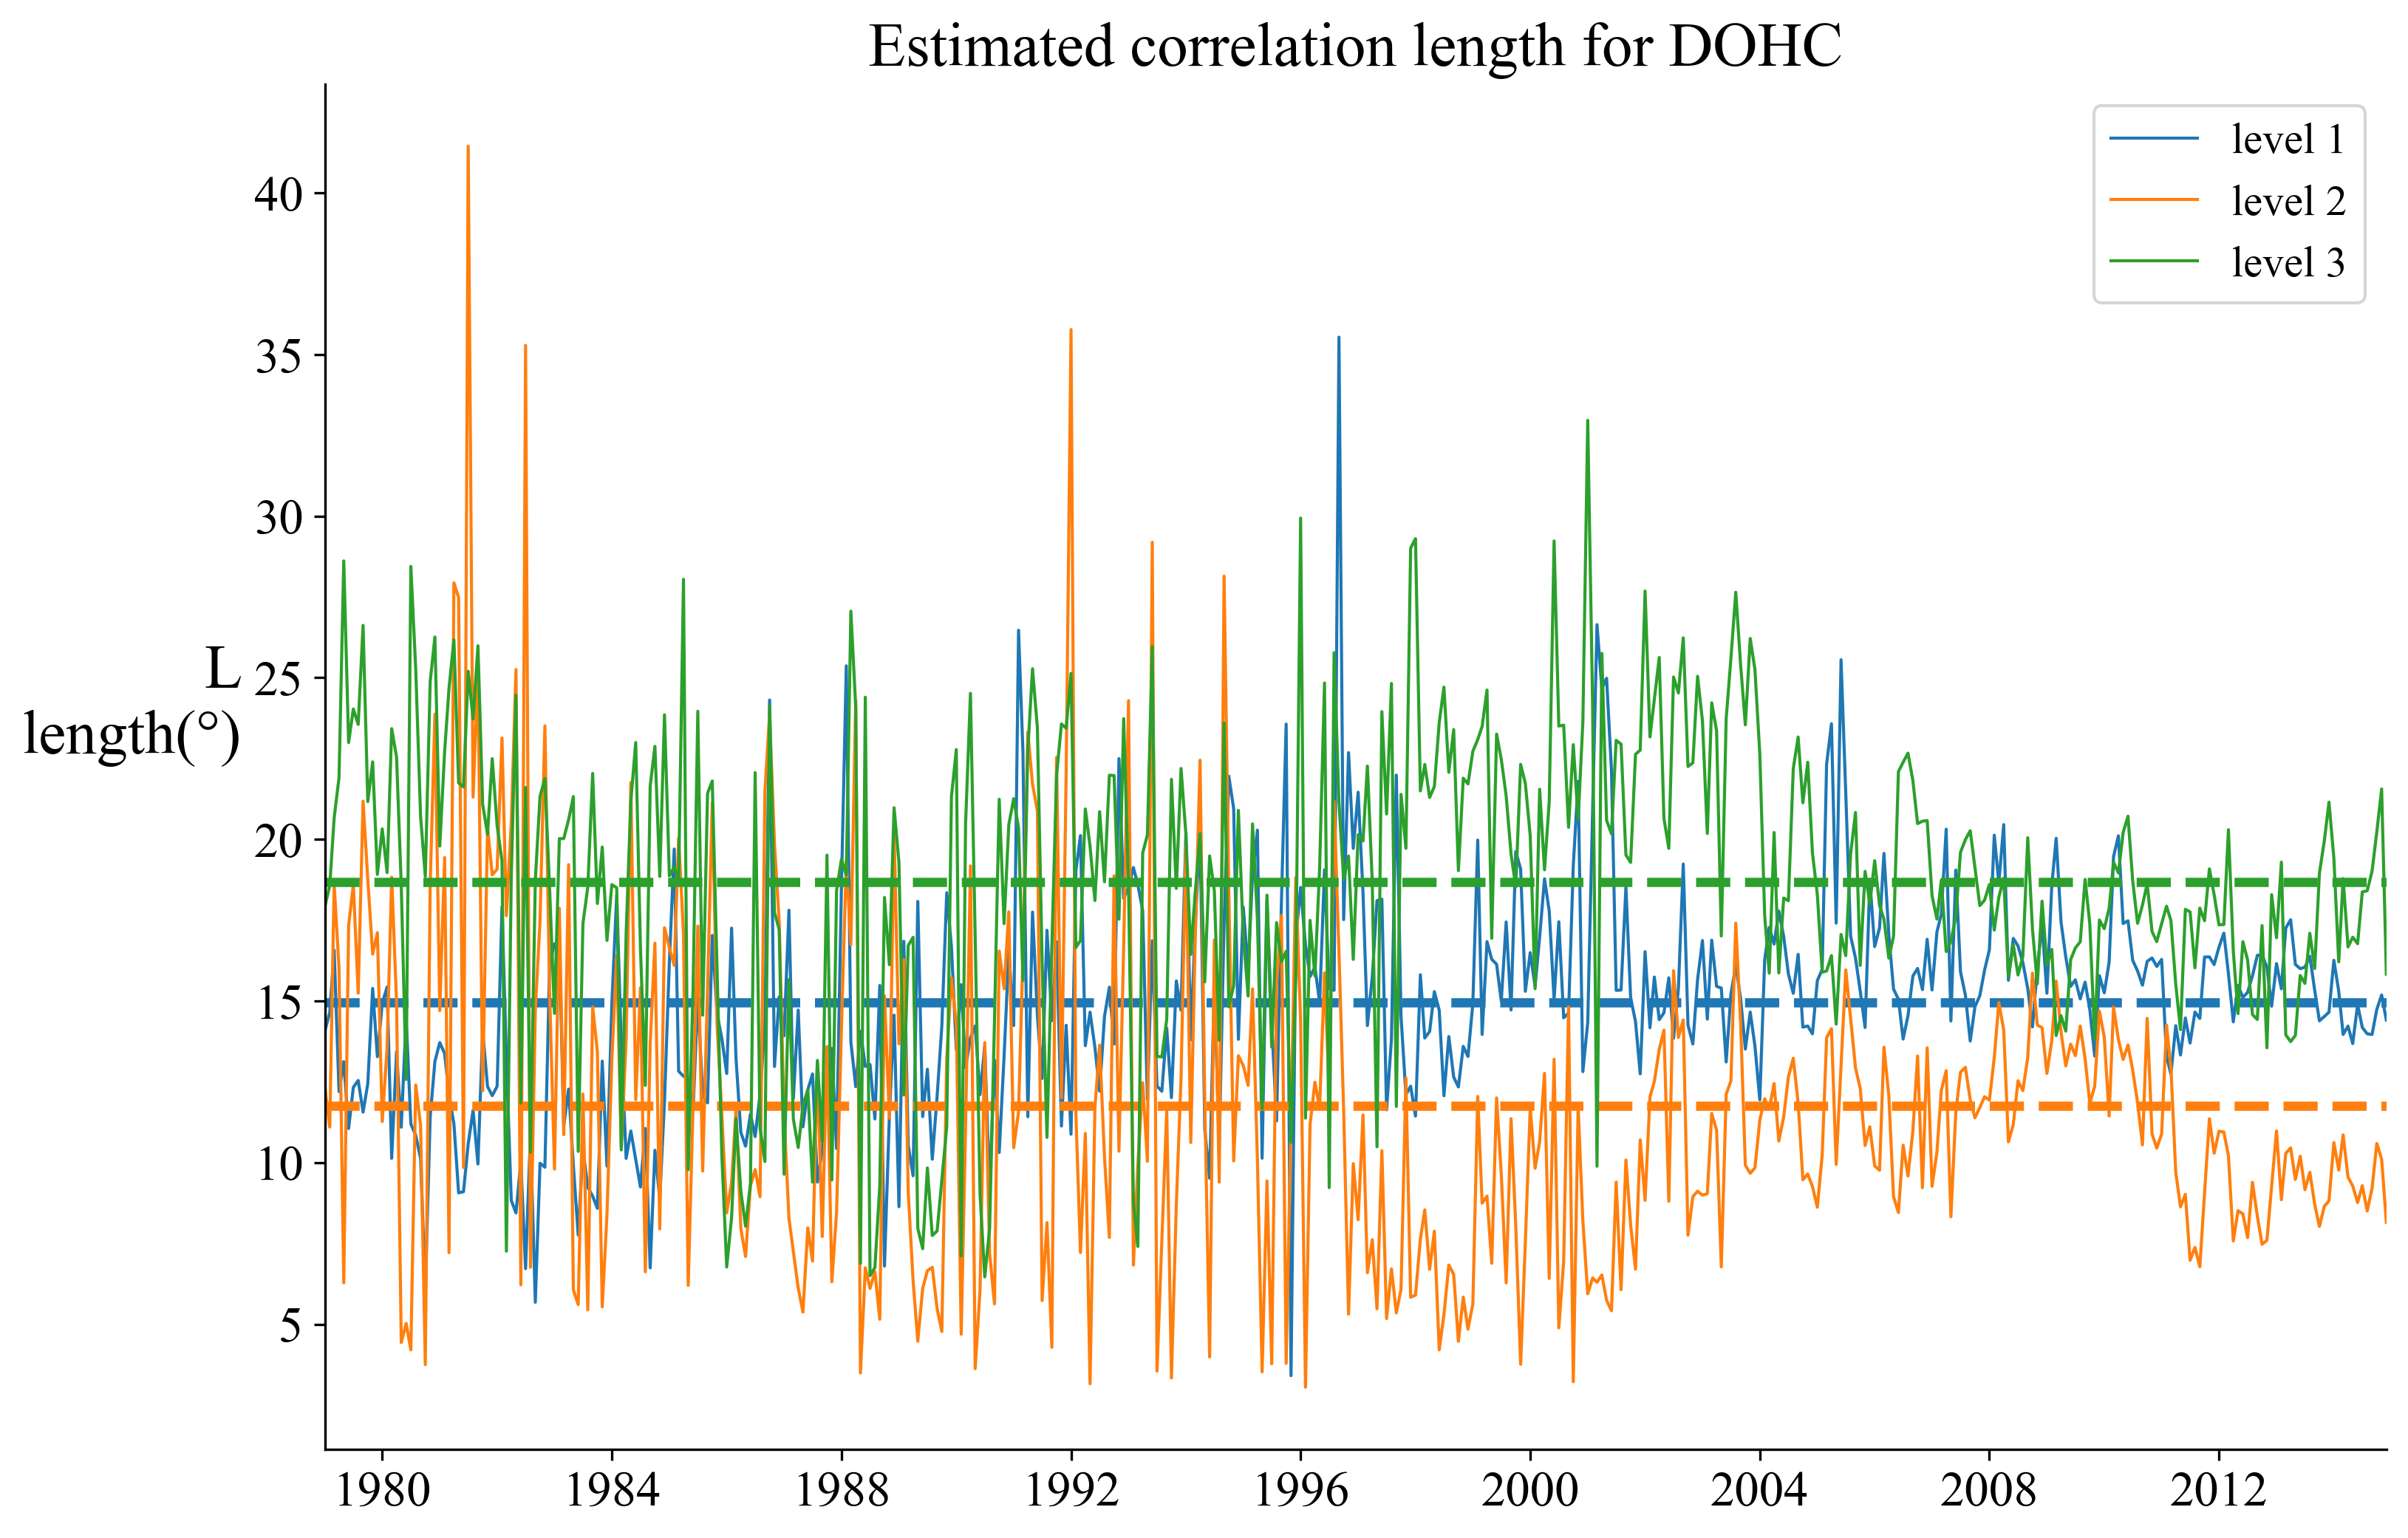

In [28]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
for (iii, CLfile) in enumerate(CLlist)
    data = readdlm(CLfile)
    p1 = ax.plot(datesr, data, lw=1, label="level $(iii)")
    thecolor = p1[1].get_color()
    ax.hlines(mean(data), xmin=datesr[1], xmax=datesr[end], linestyle="dashed", color=thecolor)
end
ax.set_ylabel("L\nlength(°)", ha="right", rotation=0)
ax.spines["top"].set_visible(false)
ax.spines["right"].set_visible(false)
ax.set_xlim(datesr[1], datesr[end])
ax.legend(fontsize=14)
ax.set_title("Estimated correlation length for DOHC")
plt.show()

In [25]:
CLlist = ["/home/ctroupin/Projects/DIVAnd-ME4OH/src/correlationlength_1979-2014_dadohc_level1.txt",
          "/home/ctroupin/Projects/DIVAnd-ME4OH/src/correlationlength_1979-2014_dadohc_level2.txt",
          "/home/ctroupin/Projects/DIVAnd-ME4OH/src/correlationlength_1979-2014_dadohc_level3.txt"]

3-element Vector{String}:
 "/home/ctroupin/Projects/DIVAnd-" ⋯ 24 bytes ⋯ "gth_1979-2014_dadohc_level1.txt"
 "/home/ctroupin/Projects/DIVAnd-" ⋯ 24 bytes ⋯ "gth_1979-2014_dadohc_level2.txt"
 "/home/ctroupin/Projects/DIVAnd-" ⋯ 24 bytes ⋯ "gth_1979-2014_dadohc_level3.txt"

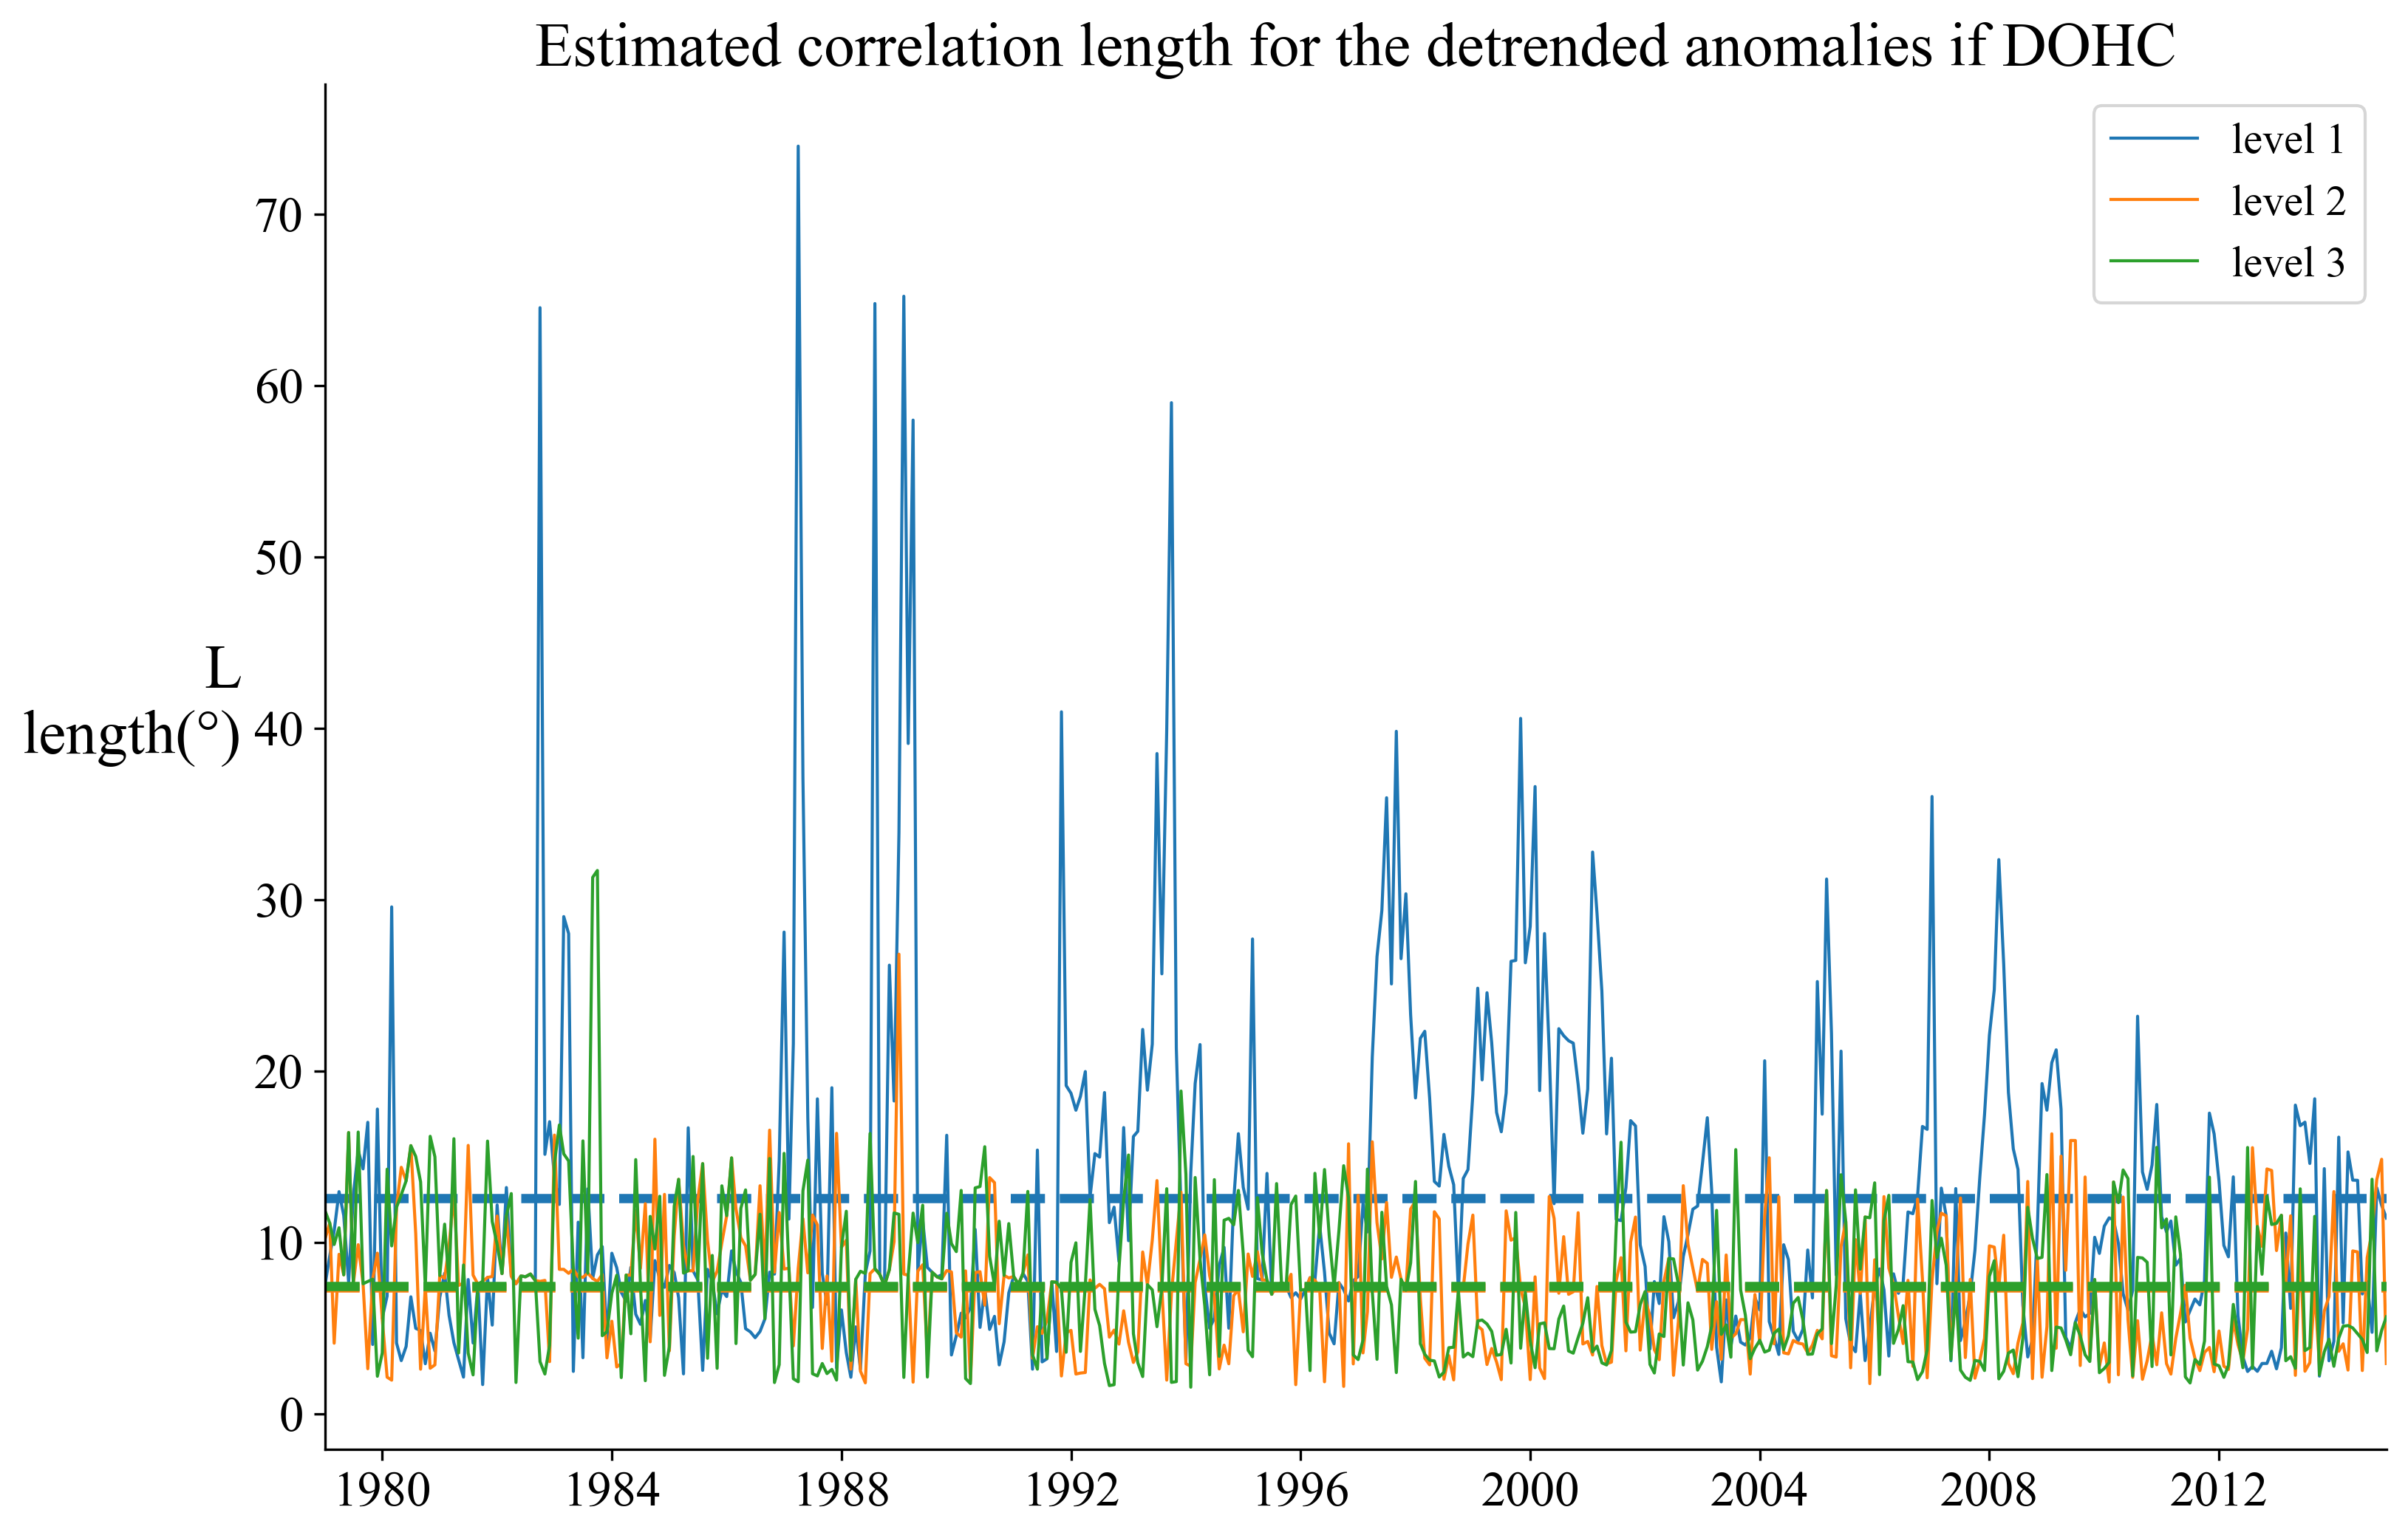

In [26]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
for (iii, CLfile) in enumerate(CLlist)
    data = readdlm(CLfile)
    p1 = ax.plot(datesr, data, lw=1, label="level $(iii)")
    thecolor = p1[1].get_color()
    ax.hlines(mean(data), xmin=datesr[1], xmax=datesr[end], linestyle="dashed", color=thecolor)
end
ax.set_ylabel("L\nlength(°)", ha="right", rotation=0)
ax.spines["top"].set_visible(false)
ax.spines["right"].set_visible(false)
ax.set_xlim(datesr[1], datesr[end])
ax.legend(fontsize=14)
ax.set_title("Estimated correlation length for the detrended anomalies of DOHC")
plt.show()